**model will predict if students pass based on study hours**

In [1]:
import numpy as np
x = np.array([[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]])
y = np.array([0,0,0,0,1,1,1,1,1,1])

In [2]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [3]:
from sklearn.linear_model import LogisticRegression

In [4]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [5]:
y_pred = model.predict(x_test)
print(y_pred)

[1 0]


In [6]:
from sklearn.metrics import accuracy_score 
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


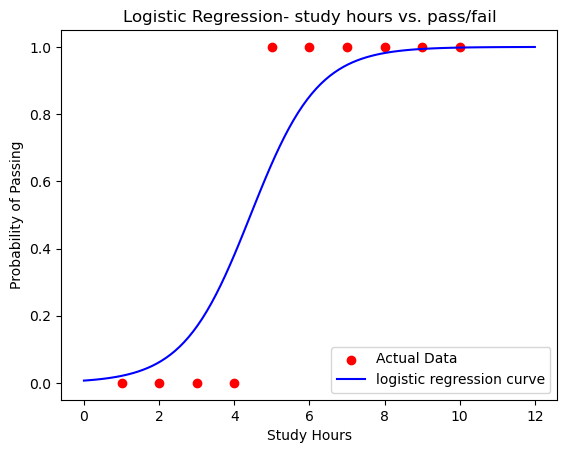

In [10]:
import matplotlib.pyplot as plt
x_range = np.linspace(0,12,100).reshape(-1,1)
y_prob = model.predict_proba(x_range)[:,1]
plt.scatter(x,y,color="red",label="Actual Data")
plt.plot(x_range,y_prob,color="blue",label="logistic regression curve")
plt.xlabel("Study Hours")
plt.ylabel("Probability of Passing")
plt.title("Logistic Regression- study hours vs. pass/fail")
plt.legend()
plt.show()

In [11]:
import pandas as pd
data = pd.read_csv("heart.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


***Feature selection and preprocessing***

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X=data.drop("target",axis=1)
y=data["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
#Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

***Model Evaluation***

Accuracy:0.795122

Classifcation Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



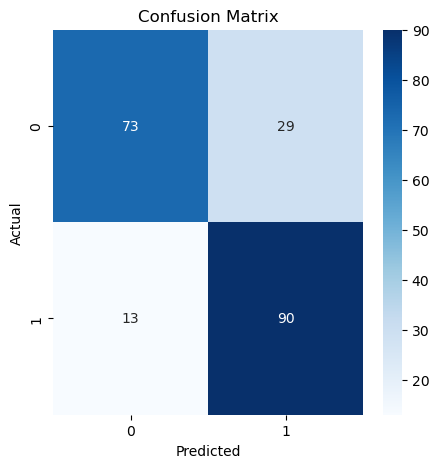

In [28]:
import seaborn as sns
from sklearn.metrics import classification_report
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy:{accuracy:2f}")
print("\nClassifcation Report:\n",classification_report(y_test,y_pred))
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d",cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


***What is Decision Tree***

A decision tree is a flowchart-like structure where:

Each internal node represents a decision 

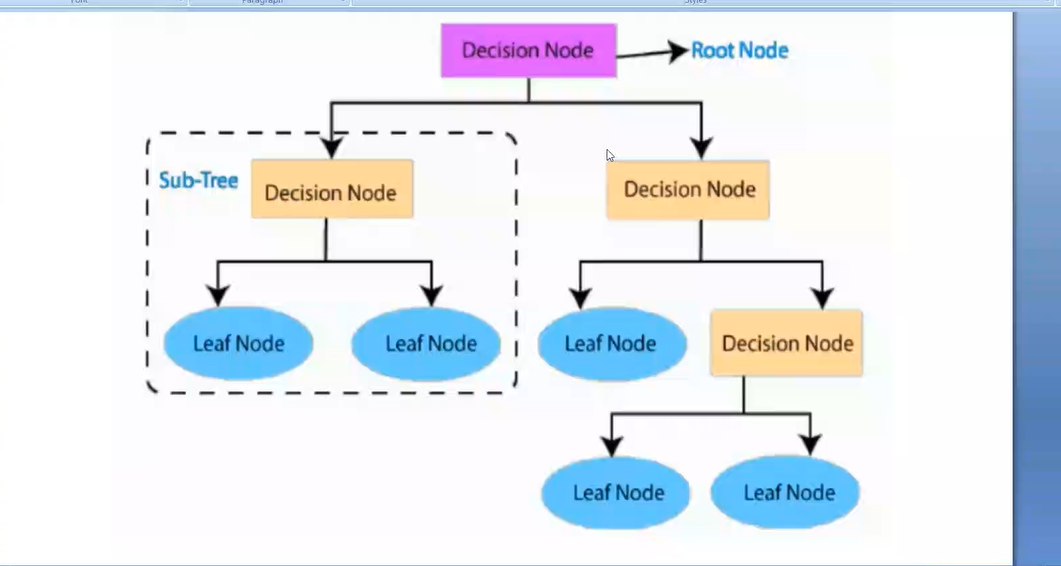